# Predict Silicon Price

### Investigating the relationship between the stock prices of technology companies and the price of silicon

---

imports the necessary libraries for data manipulation, analysis, and visualization.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

defines a list of stock tickers, downloads the stock data using the `yfinance` library, and creates a Pandas DataFrame with the stock closing prices.

In [2]:
# Define a list of ticker symbols for clarity and maintainability
tickers = ['AAPL', 'TSLA', 'MSFT', 'NVDA', 'GOOG', 'INTC', 'QCOM', 'AMD', 'ORCL']

# Download stock data in a more efficient way using a loop
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start='2019-01-01', end='2024-06-06', interval='1wk')['Close']

df_stock = pd.DataFrame(stock_data)
df_metal = pd.read_csv('./Metal_price.csv')
df_metal.set_index('Date', inplace=True)
df_metal.index = pd.to_datetime(df_metal.index)
df_metal.index = df_metal.index.strftime('%Y-%m-%d')
df_metal_reset = df_metal.reset_index()
df_metal_cleaned = df_metal_reset.drop_duplicates(subset='Date', keep='first')
df_metal_cleaned = df_metal_cleaned.set_index('Date')
df_metal_cleaned.index = pd.to_datetime(df_metal_cleaned.index)


scaler = MinMaxScaler()
df_stock = pd.DataFrame(scaler.fit_transform(df_stock), index=df_stock.index, columns=df_stock.columns)
df_stock = df_stock.round(3)

df_metal_cleaned = pd.DataFrame(scaler.fit_transform(df_metal_cleaned), index=df_metal_cleaned.index, columns=df_metal_cleaned.columns)
df_metal_cleaned = df_metal_cleaned.round(3)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
df = pd.merge(df_stock, df_metal_cleaned, left_on='Date', right_on='Date', how='outer').reset_index()
df = df.sort_values(by='Date').set_index('Date')
df


,AAPL,TSLA,MSFT,NVDA,GOOG,INTC,QCOM,AMD,ORCL,Gold,Platinium,Palladium,Silver
Date,,,,,,,,,,,,,
2019-01-01,0.000,0.027,0.000,0.002,0.013,0.532,0.042,0.002,0.056,NaN,NaN,NaN,NaN
2019-01-08,0.003,0.027,0.000,0.004,0.003,0.553,0.047,0.000,0.064,NaN,NaN,NaN,NaN
2019-01-15,0.014,0.021,0.017,0.005,0.024,0.573,0.035,0.003,0.077,NaN,NaN,NaN,NaN
2019-01-22,0.013,0.020,0.009,0.001,0.013,0.515,0.006,0.000,0.080,NaN,NaN,NaN,NaN
2019-01-29,0.037,0.023,0.011,0.003,0.038,0.574,0.000,0.021,0.098,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-21,0.959,0.428,1.000,0.877,0.983,0.137,1.000,0.789,0.943,NaN,NaN,NaN,NaN
2024-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.971,0.554,0.008,0.972
2024-05-28,0.985,0.420,0.949,0.949,0.968,0.127,0.972,0.774,0.900,NaN,NaN,NaN,NaN


creates a line plot to visualize the stock prices over time for the selected tickers.

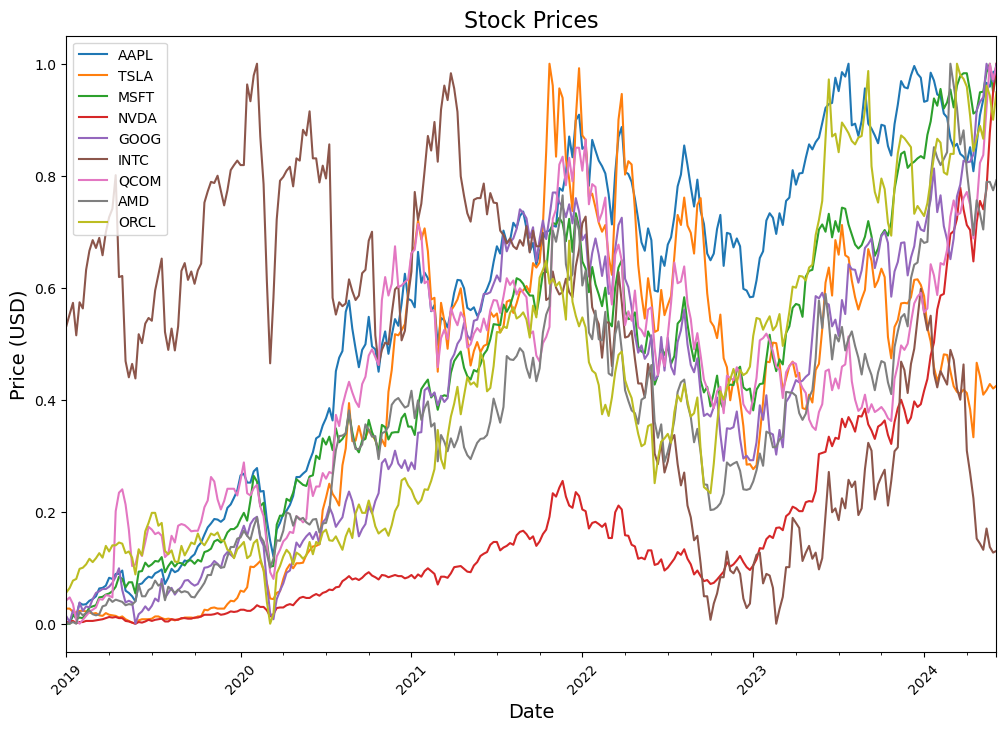

In [4]:
# creates a line plot to visualize the stock prices over time for the selected tickers.

fig, ax = plt.subplots(figsize=(12, 8))
for ticker in tickers:
    df_stock[ticker].plot(ax=ax, label=ticker)

# Set the title and axis labels
ax.set_title('Stock Prices', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price (USD)', fontsize=14)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the legend
ax.legend()

# Show the plot
plt.show()

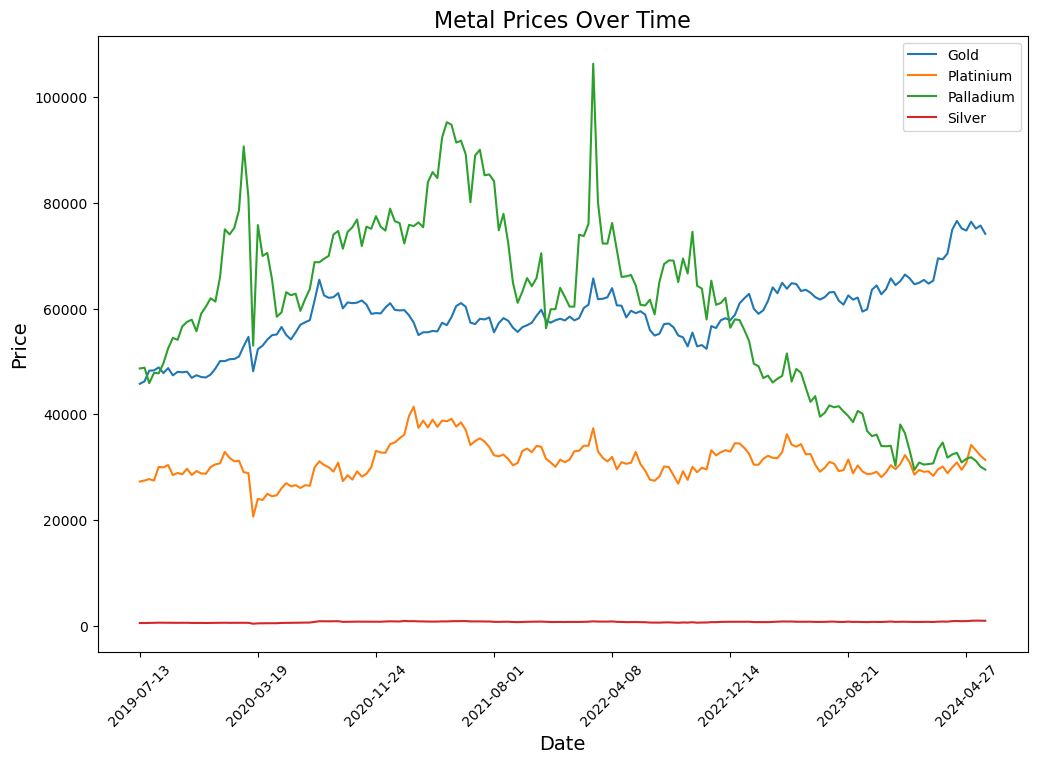

In [5]:


fig, ax = plt.subplots(figsize=(12, 8))

# Assuming you want to plot all metals in the same figure
metals = ['Gold', 'Platinium', 'Palladium', 'Silver']
for metal in metals:
    df_metal[metal].plot(ax=ax, label=metal)

# Set the title and axis labels
ax.set_title('Metal Prices Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price', fontsize=14)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the legend
ax.legend()

# Show the plot
plt.show()

---

loads the silicon price data from an Excel file, creates new columns for the converted dollar and euro prices, and visualizes the silicon prices over time using line plots.

In [6]:
silicon_price = pd.read_excel('./Silicon_price.xlsx')

silicon_price['Dollar_Price_rotate'] = silicon_price['U.S. Price'] * 537.5
silicon_price['Euro_Price_rotate'] = silicon_price['U.S. Price'] * 687.2

silicon_price.head(3)

,Date,U.S. Price,Euro Price,Dollar_Price_rotate,Euro_Price_rotate
0,2018-01-01,3.05,2.35,1639.375,2095.960
1,2018-02-01,3.13,2.39,1682.375,2150.936
2,2018-03-01,3.15,2.40,1693.125,2164.680


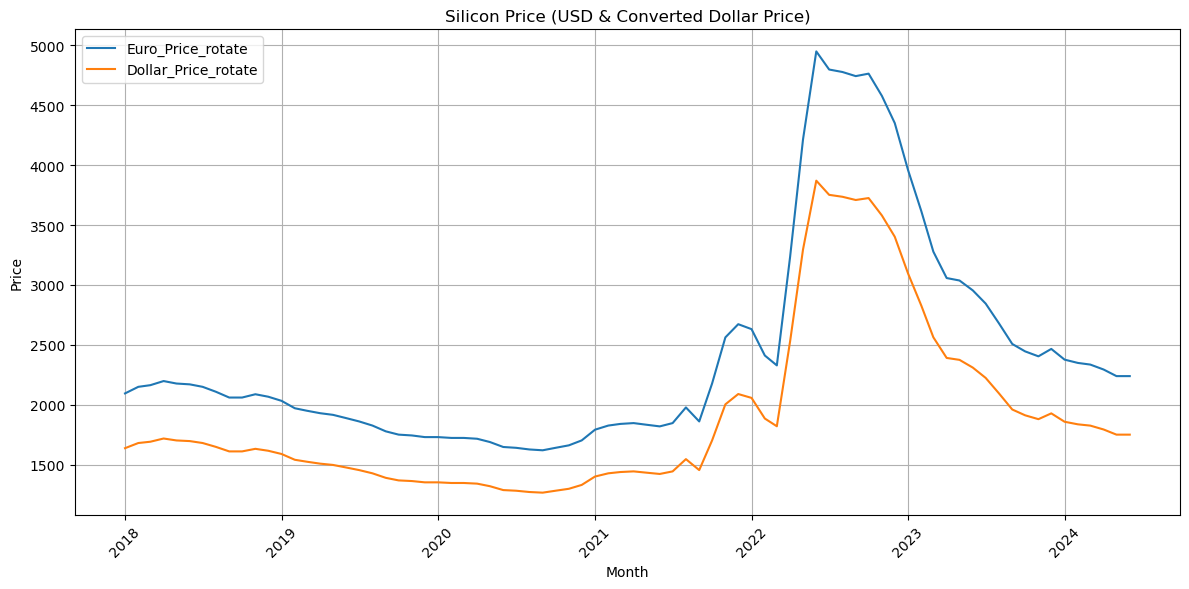

In [7]:
data_to_plot = ['Euro_Price_rotate', 'Dollar_Price_rotate']

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(silicon_price['Date'], silicon_price[data_to_plot])
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Silicon Price (USD & Converted Dollar Price)')

# Add labels for each line
plt.legend(data_to_plot, loc='upper left')

# Rotate x-axis labels for better readability with many data points
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Missing Value Handling and Clean Data

In [8]:
df.isna().sum()

AAPL         154
TSLA         154
MSFT         154
NVDA         154
GOOG         154
INTC         154
QCOM         154
AMD          154
ORCL         154
Gold         258
Platinium    258
Palladium    258
Silver       258
dtype: int64

In [9]:
df = df.interpolate().dropna()
df.isna().sum()

AAPL         0
TSLA         0
MSFT         0
NVDA         0
GOOG         0
INTC         0
QCOM         0
AMD          0
ORCL         0
Gold         0
Platinium    0
Palladium    0
Silver       0
dtype: int64

In [10]:
df = pd.merge(df, silicon_price[['Date', 'U.S. Price']], left_on='Date', right_on='Date', how='outer').interpolate().dropna()
(df.set_index('Date', inplace=True))
df

,AAPL,TSLA,MSFT,NVDA,GOOG,INTC,QCOM,AMD,ORCL,Gold,Platinium,Palladium,Silver,U.S. Price
Date,,,,,,,,,,,,,,
2019-09-01,0.0995,0.0085,0.1085,0.0085,0.0630,0.5805,0.1765,0.0585,0.1245,0.066000,0.4480,0.263,0.315000,2.590000
2019-09-03,0.1040,0.0090,0.1080,0.0100,0.0660,0.6300,0.1780,0.0560,0.1390,0.076333,0.4550,0.275,0.314333,2.584286
2019-09-10,0.1130,0.0110,0.1040,0.0100,0.0770,0.6440,0.1760,0.0580,0.1220,0.086667,0.4620,0.287,0.313667,2.578571
2019-09-11,0.1120,0.0110,0.1085,0.0095,0.0775,0.6290,0.1735,0.0570,0.1275,0.097000,0.4690,0.299,0.313000,2.572857
2019-09-17,0.1110,0.0110,0.1130,0.0090,0.0780,0.6140,0.1710,0.0560,0.1330,0.074500,0.4235,0.312,0.287000,2.567143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,0.9880,0.4250,0.9830,1.0000,0.9990,0.1300,0.9940,0.7920,0.9490,0.920000,0.5160,0.001,0.957000,3.420000
2024-03-01,0.9880,0.4250,0.9830,1.0000,0.9990,0.1300,0.9940,0.7920,0.9490,0.920000,0.5160,0.001,0.957000,3.400000
2024-04-01,0.9880,0.4250,0.9830,1.0000,0.9990,0.1300,0.9940,0.7920,0.9490,0.920000,0.5160,0.001,0.957000,3.340000


# Start ML Modeling
---

imports various machine learning models and functions from the scikit-learn library.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [12]:
abs(df.corr()).style.background_gradient(cmap='Greens')

,AAPL,TSLA,MSFT,NVDA,GOOG,INTC,QCOM,AMD,ORCL,Gold,Platinium,Palladium,Silver,U.S. Price
AAPL,1.000000,0.656071,0.924440,0.727627,0.887523,0.676372,0.777952,0.863997,0.894201,0.791295,0.218972,0.605795,0.712008,0.367752
TSLA,0.656071,1.000000,0.441739,0.087343,0.503770,0.203462,0.453142,0.444180,0.372976,0.212544,0.379079,0.054799,0.356574,0.300586
MSFT,0.924440,0.441739,1.000000,0.896204,0.959853,0.590784,0.840219,0.962640,0.954981,0.888645,0.129095,0.733696,0.745658,0.165030
NVDA,0.727627,0.087343,0.896204,1.000000,0.863275,0.583886,0.828048,0.872388,0.860292,0.902130,0.014754,0.797414,0.730238,0.034964
GOOG,0.887523,0.503770,0.959853,0.863275,1.000000,0.510625,0.888412,0.925084,0.903906,0.822585,0.236637,0.601916,0.766375,0.119577
INTC,0.676372,0.203462,0.590784,0.583886,0.510625,1.000000,0.451510,0.475850,0.645168,0.606562,0.081728,0.666492,0.414181,0.675380
QCOM,0.777952,0.453142,0.840219,0.828048,0.888412,0.451510,1.000000,0.882081,0.721548,0.810004,0.311318,0.459064,0.828685,0.062234
AMD,0.863997,0.444180,0.962640,0.872388,0.925084,0.475850,0.882081,1.000000,0.878800,0.871175,0.130849,0.662865,0.748358,0.045225
ORCL,0.894201,0.372976,0.954981,0.860292,0.903906,0.645168,0.721548,0.878800,1.000000,0.826741,0.125876,0.788973,0.685599,0.222863
Gold,0.791295,0.212544,0.888645,0.902130,0.822585,0.606562,0.810004,0.871175,0.826741,1.000000,0.128151,0.684327,0.851360,0.072083


In [13]:
feature = ['AAPL', 'TSLA', 'MSFT', 'NVDA', 'GOOG', 'INTC', 'QCOM', 'AMD', 'ORCL', 'Gold', 'Platinium', 'Palladium', 'Silver']
X = df[feature]
y = df['U.S. Price']

X_train = X[:-120]
X_test = X[-120:]
y_train = y[:-120]
y_test = y[-120:]

---

trains a linear regression model on the training data and evaluates its performance on the test data using the R-squared metric.

In [14]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print(f'r2_ Linear Reggresion Model: {r2_score(y_test, y_pred)}')

r2_ Linear Reggresion Model: -27.51157544365232


using StandardScaler, trains a Support Vector Regression (SVR) model with an RBF kernel on the scaled training data, and evaluates its performance on the test data using the R-squared metric.

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf')  # Using Radial basis function kernel
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

print(f'r2_Support Vector Regression: {r2_score(y_test, y_pred_svr)}')


r2_Support Vector Regression: -0.011359355113484515


trains a Decision Tree Regressor model on the training data and evaluates its performance on the test data using the R-squared metric.

In [16]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

print(f'r2_Decision Tree Regressor: {r2_score(y_test, y_pred_dtr)}')


r2_Decision Tree Regressor: -0.22546632224674124


trains a Random Forest Regressor model with 100 estimators on the training data and evaluates its performance on the test data using the R-squared metric.

In [17]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

print(f'r2_Random Forest Regressor: {r2_score(y_test, y_pred_rfr)}')

r2_Random Forest Regressor: -0.18449978138626855


trains a Ridge Regression model with an alpha value of 1.0 on the training data and evaluates its performance on the test data using the R-squared metric.

In [18]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print(f'r2_Ridge Regression: {r2_score(y_test, y_pred_ridge)}')

r2_Ridge Regression: -0.9256690868807513


trains a Lasso model with an alpha value of 1.0 on the training data and evaluates its performance on the test data using the R-squared metric.

In [19]:
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print(f'r2_Lasso Regression: {r2_score(y_test, y_pred_lasso)}')

r2_Lasso Regression: -1.0056716504772725


trains a elastic net model with an alpha value of 1.0 & l1_ratio value of 0.5 on the training data and evaluates its performance on the test data using the R-squared metric.

In [20]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha is the regularization strength; l1_ratio controls the mix of L1 and L2 regularization
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)

print(f'r2_Elastic Net Regression: {r2_score(y_test, y_pred_elastic_net)}')

r2_Elastic Net Regression: -0.7381031355599608


# Deep Learning Models

In [21]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_mlp = model.predict(X_test)
print(f'r2_Multilayer Perceptron: {r2_score(y_test, y_pred_mlp)}')

c:\Users\Mr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 12.1351 - val_loss: 19.3703
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6701 - val_loss: 15.5597
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.2900 - val_loss: 12.1455
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.0928 - val_loss: 8.8065
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2485 - val_loss: 5.5331
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4155 - val_loss: 3.1047
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1729 - val_loss: 2.1387
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9741 - val_loss: 2.1960
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.9809 - val_loss: 2.3742
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1315 - val_loss: 2.5198
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.1135 - val_loss: 2.5412
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9904 - val_loss

In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape the data to a 3D format
X_train_3d = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_3d = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the model architecture
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train_3d.shape[2])))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_3d, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_lstm = model.predict(X_test_3d).flatten()
print(f'r2_LSTM: {r2_score(y_test, y_pred_lstm)}')

Epoch 1/100


c:\Users\Mr\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 12.6946 - val_loss: 20.8447
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.4183 - val_loss: 19.0671
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.4581 - val_loss: 17.1567
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.7543 - val_loss: 15.0663
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0235 - val_loss: 12.7873
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9290 - val_loss: 10.4403
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3266 - val_loss: 8.1903
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3679 - val_loss: 6.2125
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6233 - val_loss: 4.6377
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7221 - val_loss: 3.5141
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4160 - val_loss: 2.8377
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2425 - val_loss: 2.5211
Ep

In [23]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape the data to a 3D format
X_train_3d = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_3d = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the model architecture
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train_3d.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_3d, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_cnn = model.predict(X_test_3d).flatten()
print(f'r2_CNN: {r2_score(y_test, y_pred_cnn)}')

c:\Users\Mr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 11.8221 - val_loss: 18.7740
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8846 - val_loss: 14.7276
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.5072 - val_loss: 9.5163
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.4091 - val_loss: 4.6529
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6566 - val_loss: 2.0360
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9565 - val_loss: 1.6069
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8281 - val_loss: 2.0881
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7778 - val_loss: 2.4112
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6884 - val_loss: 2.3384
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6768 - val_loss: 2.1117
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7581 - val_loss: 1.9298
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3919 - val_loss: 2.

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_lstm = model.predict(X_test_lstm)
print(f'r2_LSTM: {r2_score(y_test, y_pred_lstm)}')


Epoch 1/100


c:\Users\Mr\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 13.3458 - val_loss: 21.4497
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.8818 - val_loss: 20.2299
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1904 - val_loss: 18.1925
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1350 - val_loss: 14.8441
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2579 - val_loss: 10.1221
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4583 - val_loss: 5.1376
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0559 - val_loss: 2.1985
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0450 - val_loss: 1.6307
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0712 - val_loss: 1.7754
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0073 - val_loss: 2.0258
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0500 - val_loss: 2.1575
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7861 - val_loss: 2.1181
Epo

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y_pred_cnn = model.predict(X_test_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)
print(f'r2_CNN: {r2_cnn}')


c:\Users\Mr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 12.4552 - val_loss: 21.1752
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.8928 - val_loss: 21.4548
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5316 - val_loss: 20.5240
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5388 - val_loss: 20.1339
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4282 - val_loss: 19.3174
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3428 - val_loss: 18.4473
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3431 - val_loss: 18.1055
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6052 - val_loss: 17.2780
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6376 - val_loss: 17.0495
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2889 - val_loss: 16.6286
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3387 - val_loss: 15.9518
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5880 - val_